<center><H1> Machine Learning Lab #4

<H3> PARAMETRIC METHODS

In [38]:
#Generic Imports

import csv
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
import seaborn as sns   

In [39]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

<H2>Questions

1. Consider the Table Contains the Average Annual Gold Rate from 1965 – 2022. Gold prices
fluctuated throughout the year 2020 because of the COVID-19 epidemic. With gold functioning
as a safe haven for investors, demand for the precious metal grew, and its price followed suit.
During the epidemic, the stock market weakened, but it began to recover by the end of 2020
when the price of gold fell slightly.
It’s crucial to remember that gold prices fluctuate during the year, and the figure below
represents the average price for that year.
With the exception of a few lows shared across a few years, The table shows that the gold price
trend has always been upward, supporting the claim that gold is a secure investment over
extended periods of time.

<I>Create CSV file and Write a python program to find the fitted simple linear regression equation
for the given data. Compare the coefficients obtained from sklearn model with your program.
Compute the error, MSE and RMSE. Predict the gold price with the year 2025 for 1 gram.

In [32]:
data = [
    [2022, 52950],
    [2021, 50045],
    [2020, 48651],
    [2019, 35220],
    [2018, 31438],
    [2017, 29667],
    [2016, 28623],
    [2015, 26343],
    [2014, 28006],
    [2013, 29600],
    [2012, 31050],
    [2011, 26400],
    [2010, 18500],
    [2009, 14500],
    [2008, 12500],
    [2007, 10800],
    [2006, 8400],
    [2005, 7000],
    [2004, 5850],
    [2003, 5600],
    [2002, 4990],
    [2001, 4300],
    [2000, 4400],
    [1999, 4234],
    [1998, 4045],
    [1997, 4725],
    [1996, 5160],
    [1995, 4680],
    [1994, 4598],
    [1993, 4140],
    [1992, 4334],
    [1991, 3466],
    [1990, 3200],
    [1989, 3140],
    [1988, 3130],
    [1987, 2570],
    [1986, 2140],
    [1985, 2130],
    [1984, 1970],
    [1983, 1800],
    [1982, 1645],
    [1981, 1800],
    [1980, 1330],
    [1979, 937],
    [1978, 685],
    [1977, 486],
    [1976, 432],
    [1975, 540],
    [1974, 506],
    [1973, 279],
    [1972, 202],
    [1971, 193],
    [1970, 184],
    [1969, 176],
    [1968, 162],
    [1967, 103],
    [1966, 84],
    [1965, 72]
]

In [ ]:
#creating the csv file from the given datapoints

csv_file_path = 'goldPrices.csv'
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['year', 'price'])
    writer.writerows(data)

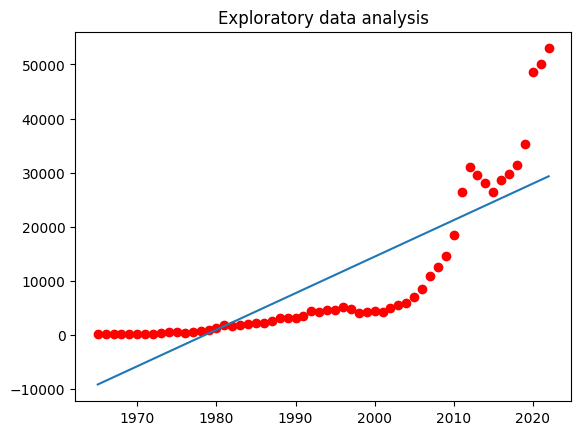

The predicted cost is 31344.204558719415


In [29]:
"""
Linear Regression
"""

data = pd.read_csv("goldPrices.csv")

x = np.array(data['year'])
y = np.array(data['price'])

#Using formula (XtX)-1 XtY
X = np.array([[len(x), np.sum(x)], [np.sum(x), np.sum(x*x)]])
Y = np.array([np.sum(y), np.sum(x*y)])
b = np.dot(np.linalg.inv(X), Y)
ypredlin = b[0] + b[1]*x
predicted_price = b[0] + b[1] * 2025

plt.plot(x, ypredlin)
plt.title("Exploratory data analysis")
plt.scatter(x, y, color='red')
plt.show()
print(f"The predicted cost is {predicted_price}")

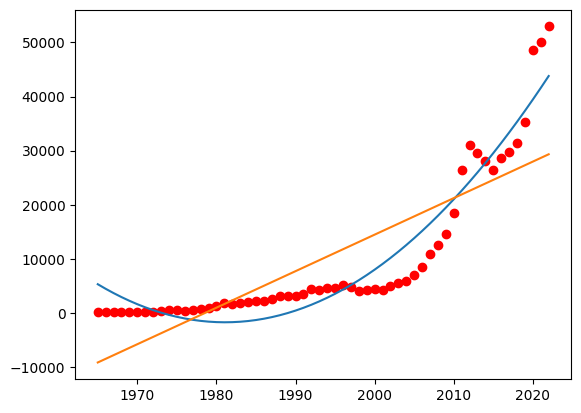

The predicted cost is 106699989.79342493


In [31]:
"""
Polynomial Regression
"""

X = np.array([[len(x), np.sum(x), np.sum(x*x)], 
              [np.sum(x), np.sum(x**2), np.sum(x**3)], 
              [np.sum(x**2), np.sum(x**3), np.sum(x**4)]])

Y = np.array([np.sum(y), np.sum(x*y), np.sum(x*x*y)])
b = np.dot(np.linalg.inv(X), Y)
ypred = b[0] + b[1]*x + b[2]*x**2
predicted_price = abs(b[0] + b[1] + b[2]* 2025)

plt.plot(x, ypred)
plt.plot(x, ypredlin)
plt.scatter(x, y, color='red')
plt.show()
print(f"The predicted cost is {predicted_price}")

In [26]:
rmse = np.mean((abs(y - ypredlin)))
print(rmse**2)

rmse_poly = np.mean(abs(y-ypred))
print(rmse_poly**2)

39851319.87158392
11750479.807909966


2. Consider the Question no 1 gold price with following year-wise silver price. Create a CSV
file and Write a python program to find the fitted multiple linear regression equation for the
given data. Compare the coefficients obtained from sklearn model with your program.
Compute the error, MSE and RMSE. Predict the gold and silver price with the year 2024 for
1 gram.

In [33]:
data2 = [
    [1981, 2715],
    [1982, 2720],
    [1983, 3105],
    [1984, 3570],
    [1985, 3955],
    [1986, 4015],
    [1987, 4794],
    [1988, 6066],
    [1989, 6755],
    [1990, 6463],
    [1991, 6646],
    [1992, 8040],
    [1993, 5489],
    [1994, 7124],
    [1995, 6335],
    [1996, 7346],
    [1997, 7345],
    [1998, 8560],
    [1999, 7615],
    [2000, 7900],
    [2001, 7215],
    [2002, 7875],
    [2003, 7695],
    [2004, 11770],
    [2005, 10675],
    [2006, 17405],
    [2007, 19520],
    [2008, 23625],
    [2009, 22165],
    [2010, 27255],
    [2011, 56900],
    [2012, 56290],
    [2013, 54030],
    [2014, 43070],
    [2015, 37825],
    [2016, 36990],
    [2017, 37825],
    [2018, 41400],
    [2019, 40600],
    [2020, 63435],
    [2021, 62572],
    [2022, 55100]
]


In [35]:
#creating the csv file from the given datapoints
csv_file_path = 'silverPrices.csv'
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['year', 'price'])
    writer.writerows(data)

In [40]:
gold = pd.read_csv('goldPrices.csv')
silver = pd.read_csv('silverPrices.csv')

df = pd.merge(gold, silver, on='year', suffixes=('_gold', '_silver'))

X = df[['year', 'price_silver']].values
y = df['price_gold'].values

X_ = np.hstack([np.ones((X.shape[0],1)), X])
b_manual = np.linalg.inv(X_.T @ X_) @ (X_.T @ y)

model = LinearRegression().fit(X, y)
b_sklearn = np.array([model.intercept_, *model.coef_])

y_pred_manual = X_ @ b_manual
mse = mean_squared_error(y, y_pred_manual)
rmse = np.sqrt(mse)

coeffs = np.polyfit(silver['year'], silver['price'], 1)
silver_2024 = coeffs[0]*2024 + coeffs[1]

gold_2024 = b_manual[0] + b_manual[1]*2024 + b_manual[2]*silver_2024

print(f"Manual Coefficients: {b_manual}")
print(f"Sklearn Coefficients: {b_sklearn}")
print(f"MSE: {mse}, RMSE: {rmse}")
print(f"Predicted Gold price in 2024: {gold_2024}")
print(f"Predicted Silver price in 2024: {silver_2024}")


Manual Coefficients: [ 2.17055099e-08 -1.08222547e-11  1.00000000e+00]
Sklearn Coefficients: [ 7.27595761e-11 -3.86169786e-14  1.00000000e+00]
MSE: 2.8615112764837582e-19, RMSE: 5.349309559638288e-10
Predicted Gold price in 2024: 30668.86090005741
Predicted Silver price in 2024: 30668.86090005841


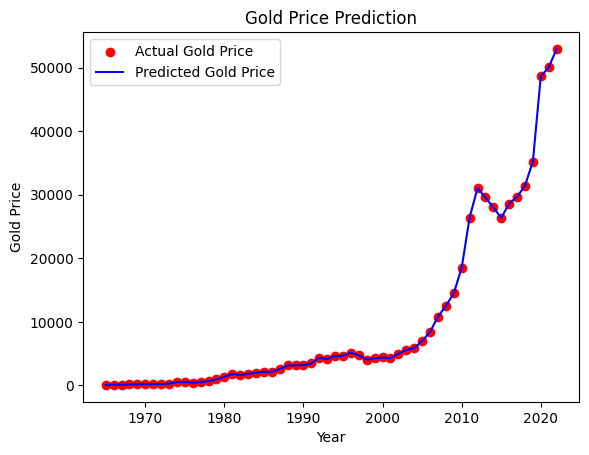

In [41]:
plt.scatter(df['year'], y, color='red', label='Actual Gold Price')
plt.plot(df['year'], y_pred_manual, color='blue', label='Predicted Gold Price')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.title('Gold Price Prediction')
plt.legend()
plt.show()


---